<a href="https://colab.research.google.com/github/soaresbru/bootcamp-Unimed-Data-science/blob/main/Telco_Churn_EDA%2BML_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# primeiro importar as bibliotecas padrão
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A base de dados pode ser encontrada em:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
# Importando os arquivos
customers = pd.read_csv("/content/Telco-Customer-Churn.csv",delimiter=',' , decimal='.')

In [ ]:
# vendo as primeiras linhas do arquivo
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# olhando informações das colunas e o tipo
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Soma de clientes churne e não churn
customers['Churn'].value_counts().sort_values(ascending=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# Tipo de pagamentos dos clientes
customers['PaymentMethod'].value_counts().sort_values(ascending=False)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

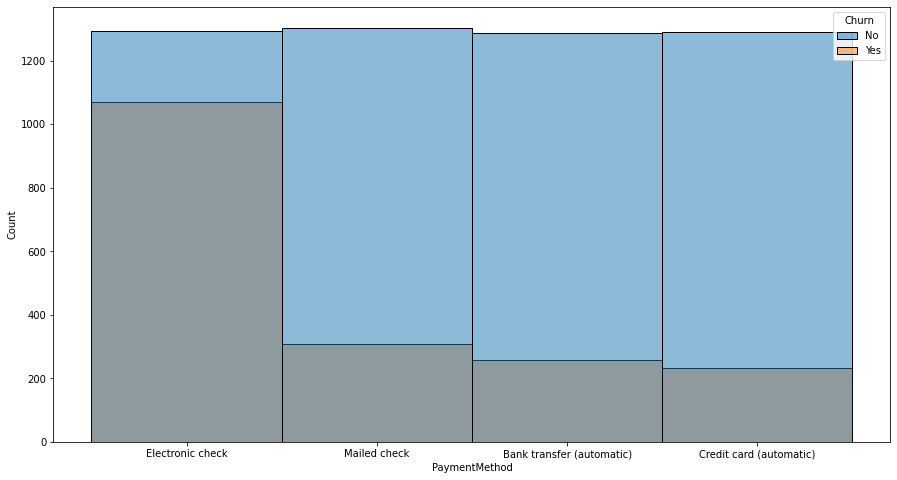

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de pagamento
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['PaymentMethod'], hue = 'Churn')
plt.show()
# Vemos o que parece ser de pessoas que pagam por Eletronic Check tem uma tendênica maior de sairam da Empresa

In [ ]:
# Quantidade de clientes em cada tipo de contrato
customers['Contract'].value_counts().sort_values(ascending=False)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

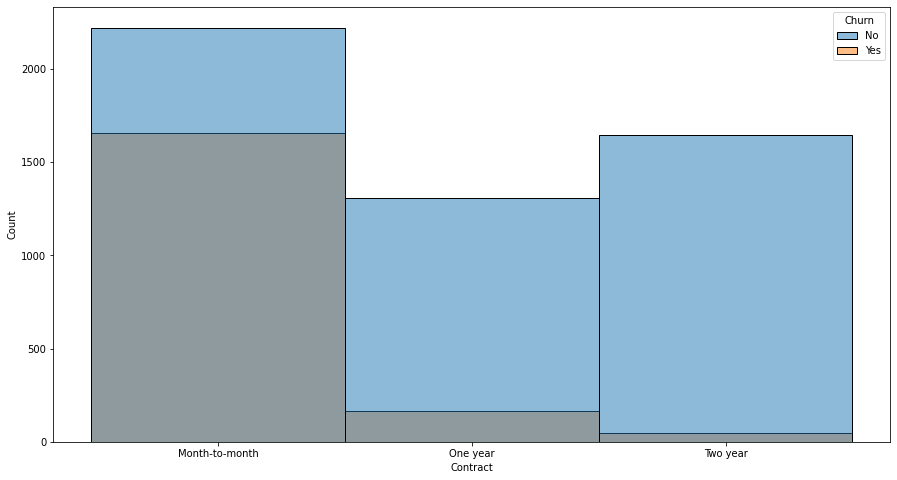

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de tempo de contrato
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['Contract'], hue = 'Churn')
plt.show()
# Como esperado, contratos de mês a mês possuem um numero maior de churn

In [ ]:
# Quantidade de clientes do sexo masculino e feminino
customers['gender'].value_counts().sort_values(ascending=False)

Male      3555
Female    3488
Name: gender, dtype: int64

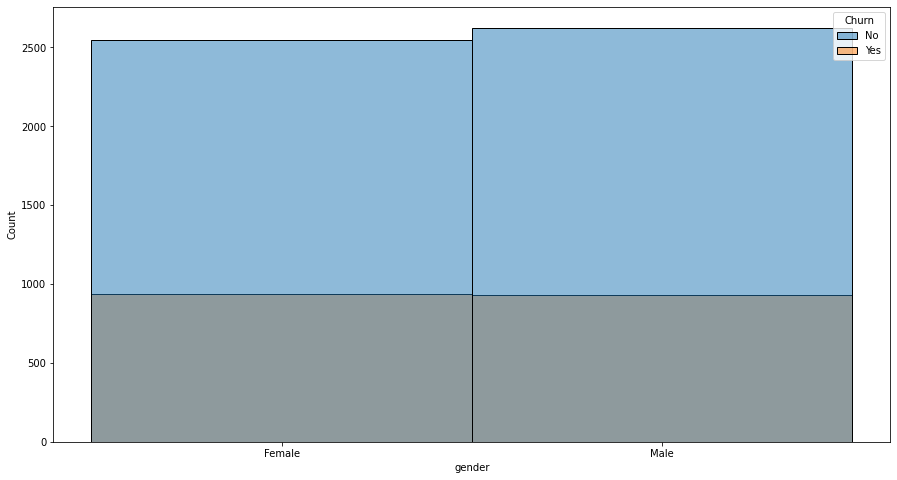

In [ ]:
# # plotando gráfico com a quantidade de churn ou não churn para cada tipo de gênero
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['gender'], hue = 'Churn')
plt.show()
# A diferença de Churn entre homem e mulher praticamente não existe

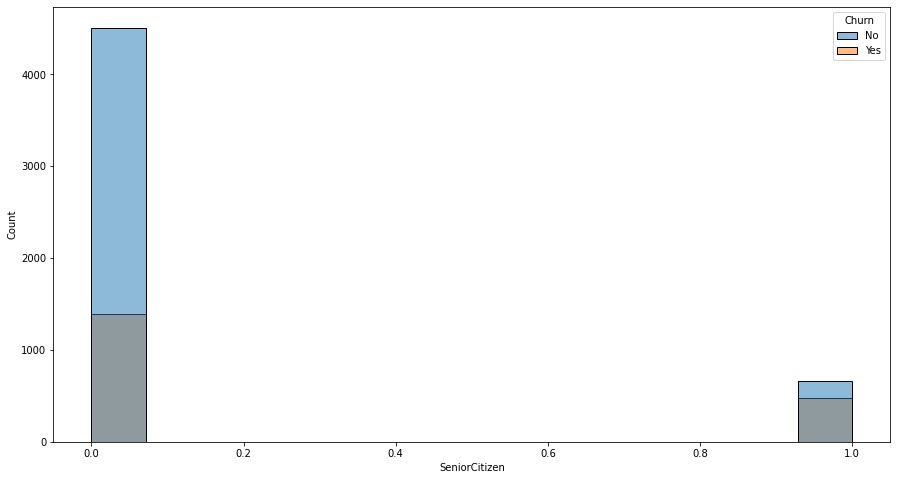

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para as contas que possuem ou não idosos
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['SeniorCitizen'], hue = 'Churn')
plt.show()
#Vemos que muitos idosos cancelam e os dados estão bem desbalanceados

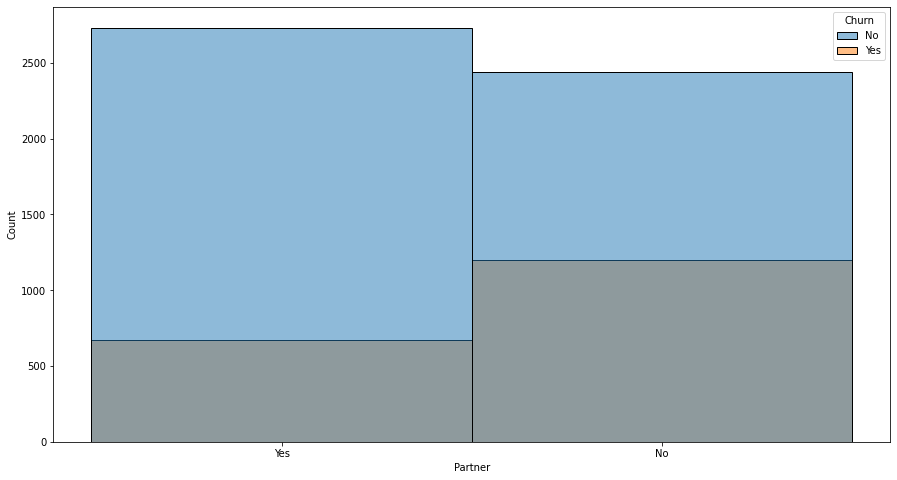

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para pessoas que possuem ou não um parceiro
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['Partner'], hue = 'Churn')
plt.show()
# Pessoas sem parceiro tem uma tendênica maior de dar churn

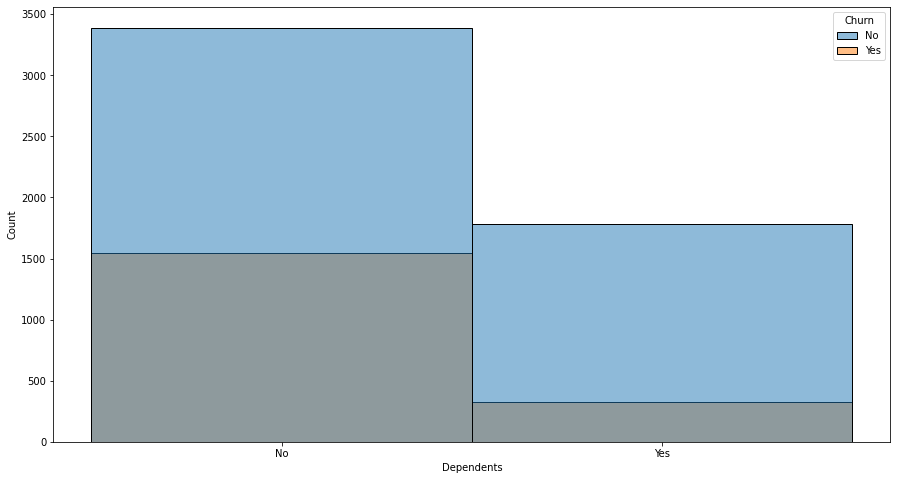

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para quem possui ou não possui dependentes
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['Dependents'], hue = 'Churn')
plt.show()

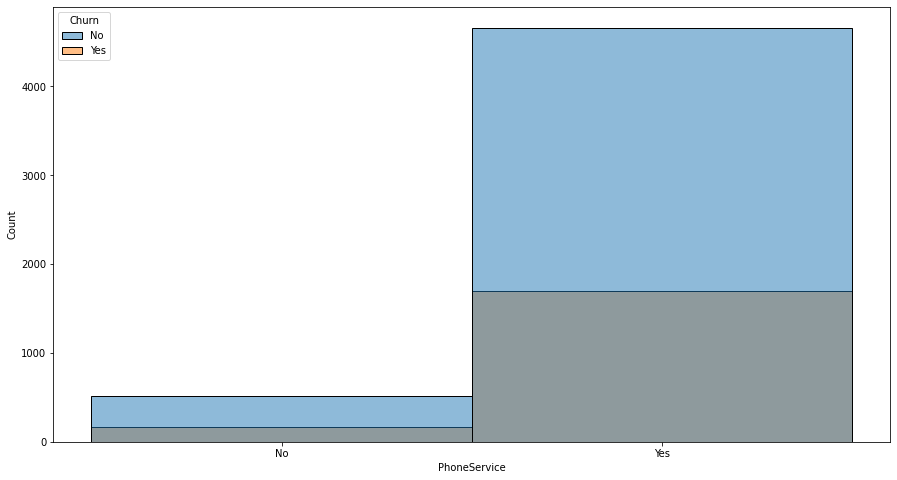

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para quem possui ou não o serviço de telefone
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['PhoneService'], hue = 'Churn')
plt.show()
# a maioria dos clientes usa serviço de telefone
# Os dados estão desbaleceados e a proporção de churn é bem parecida, pode ser bom retirar essa feature

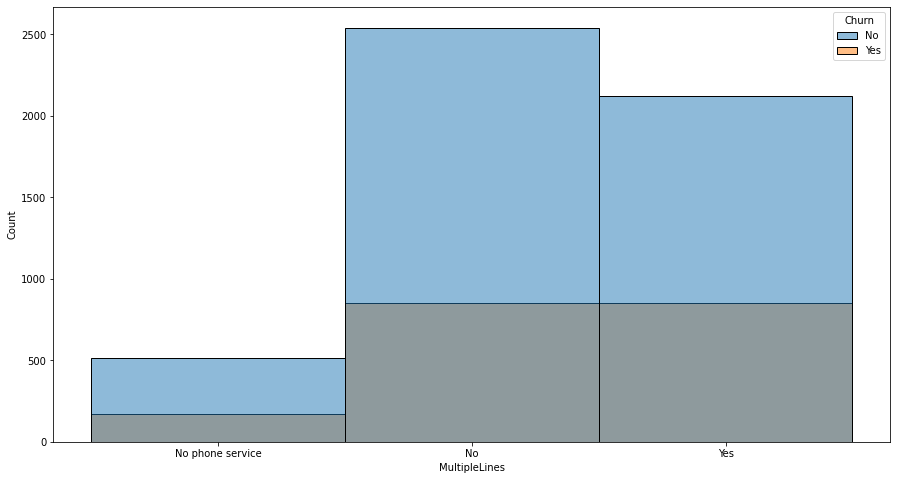

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para quem possui ou não o serviço de multiplas linhas
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['MultipleLines'], hue = 'Churn')
plt.show()

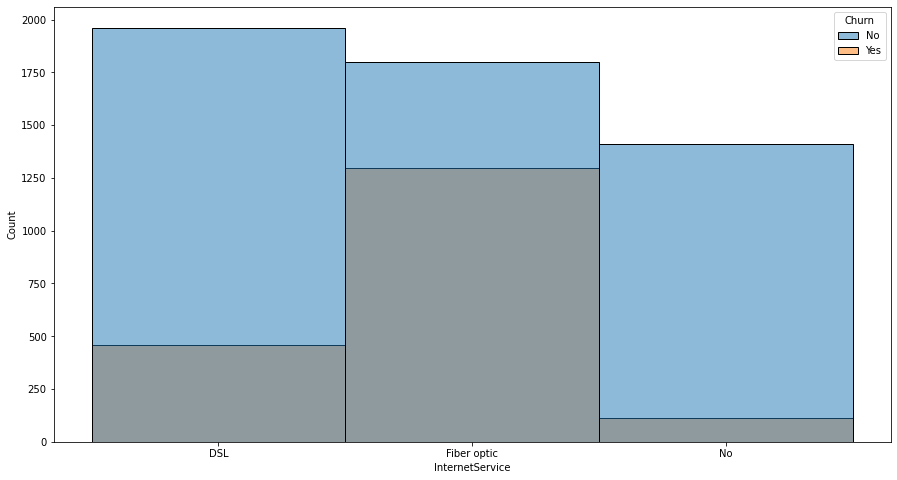

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de serviço de internet
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['InternetService'], hue = 'Churn')
plt.show()
# Muito churn vindo do serviço de internet

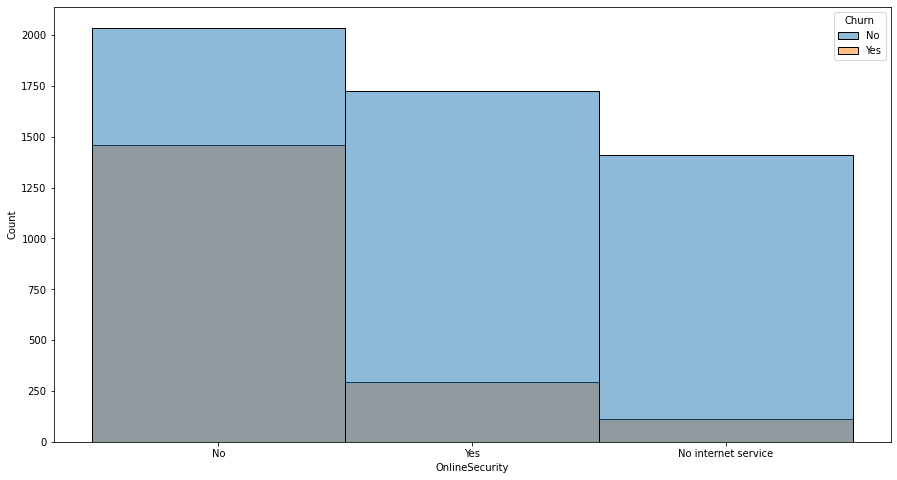

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de segurança online
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['OnlineSecurity'], hue = 'Churn')
plt.show()

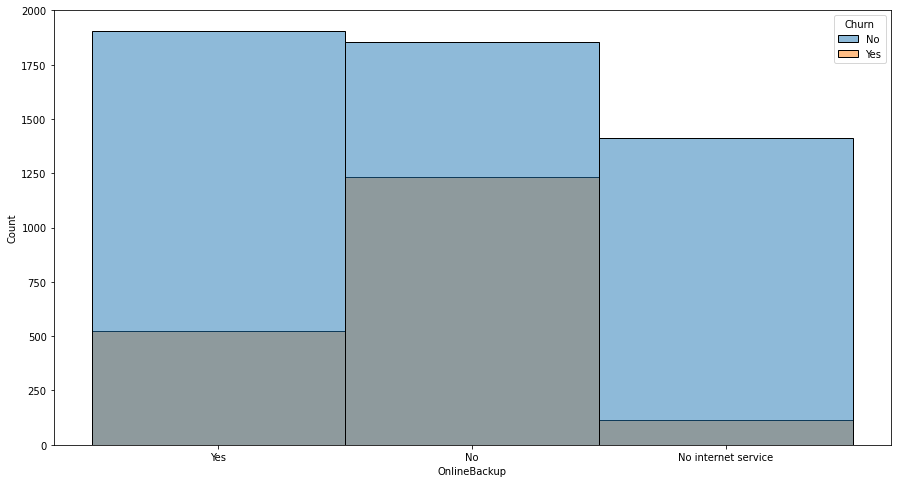

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de backup online
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['OnlineBackup'], hue = 'Churn')
plt.show()

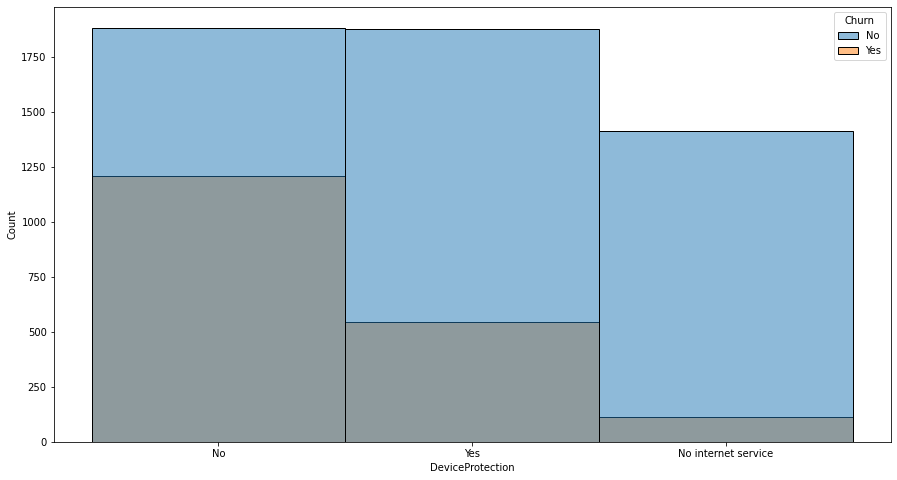

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de proteção do dispositivo
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['DeviceProtection'], hue = 'Churn')
plt.show()
# Os gráficos de 'OnlineSecurity', Online Backup e device protection são praricamente iguais, provalevemnte seja melhor eliminar algum deles

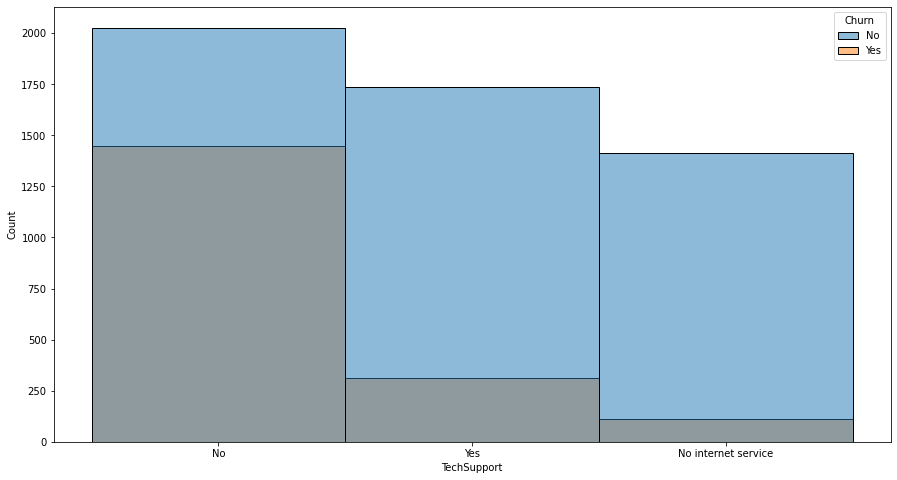

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de suporte tecnológico
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['TechSupport'], hue = 'Churn')
plt.show()
# Esse também é um pouco parecido com os outros três anteriores

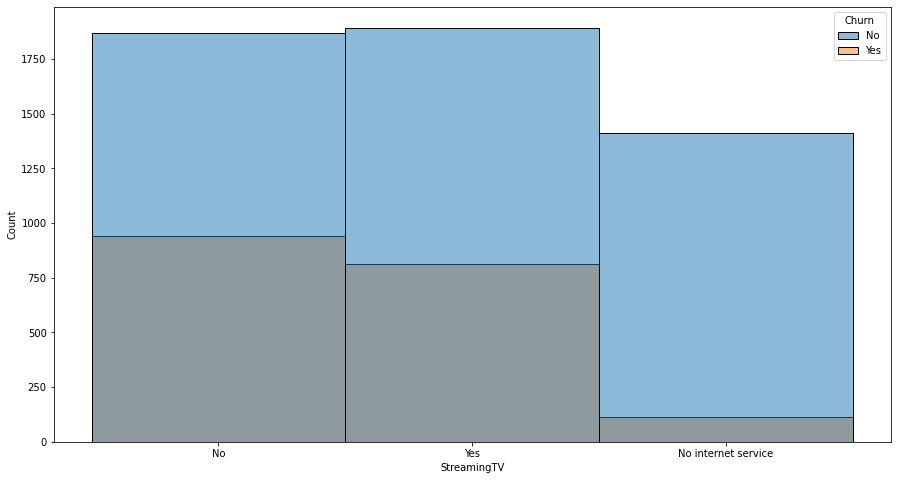

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de serviço de streaming de televisão
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['StreamingTV'], hue = 'Churn')
plt.show()

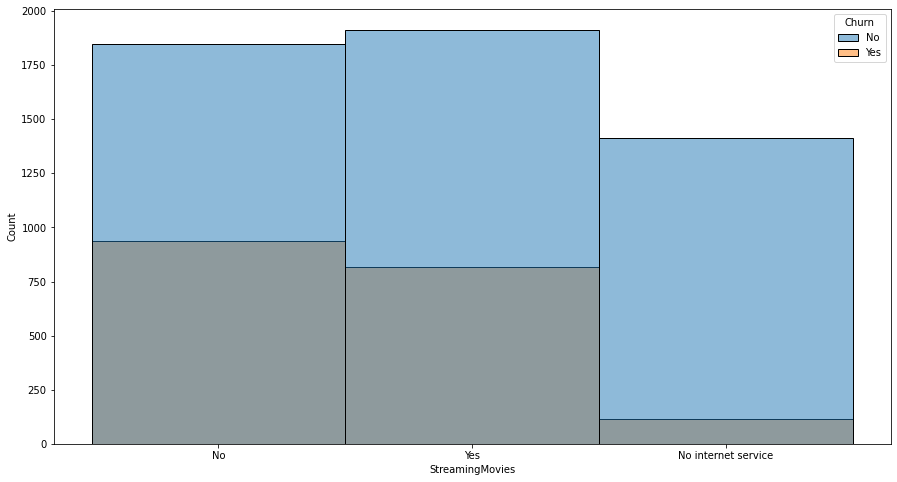

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada tipo de serviço de streaming de filmes
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['StreamingMovies'], hue = 'Churn')
plt.show()
# Muito parecido com o streaming TV

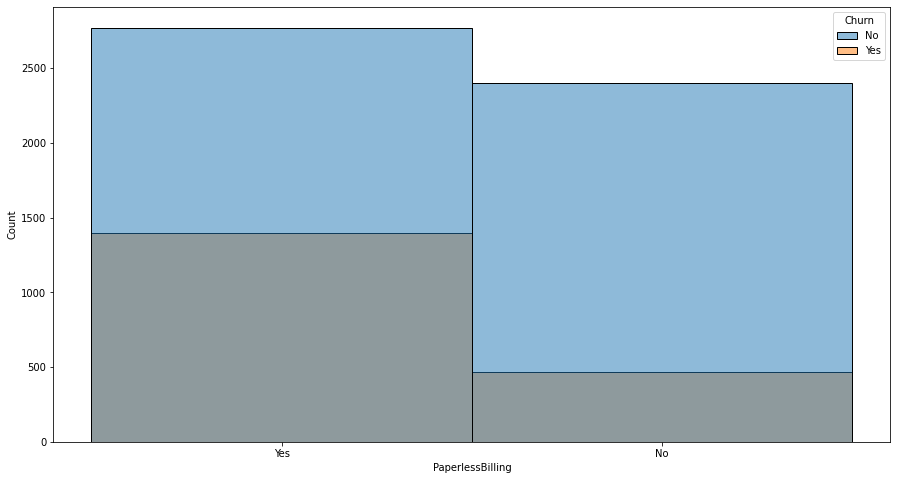

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para tipo de conta com papel ou sem papel
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['PaperlessBilling'], hue = 'Churn')
plt.show()

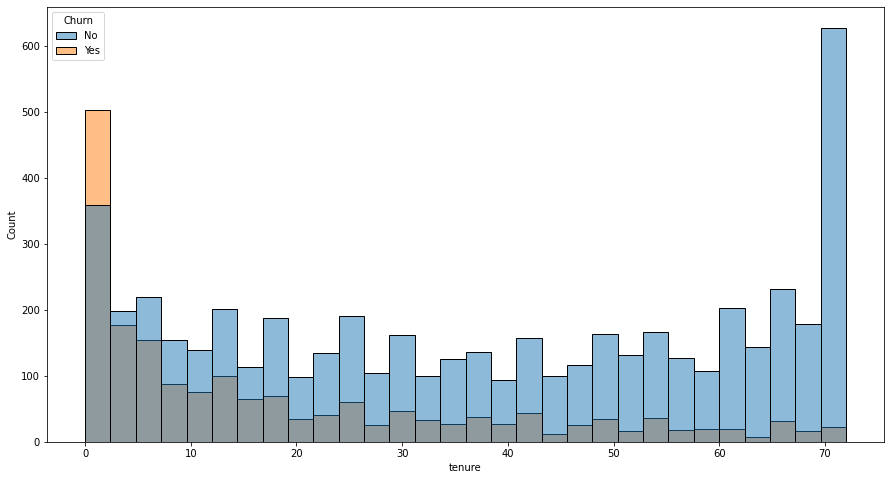

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para os meses que está usando o serviço
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['tenure'], hue = 'Churn', bins=30)
plt.show()

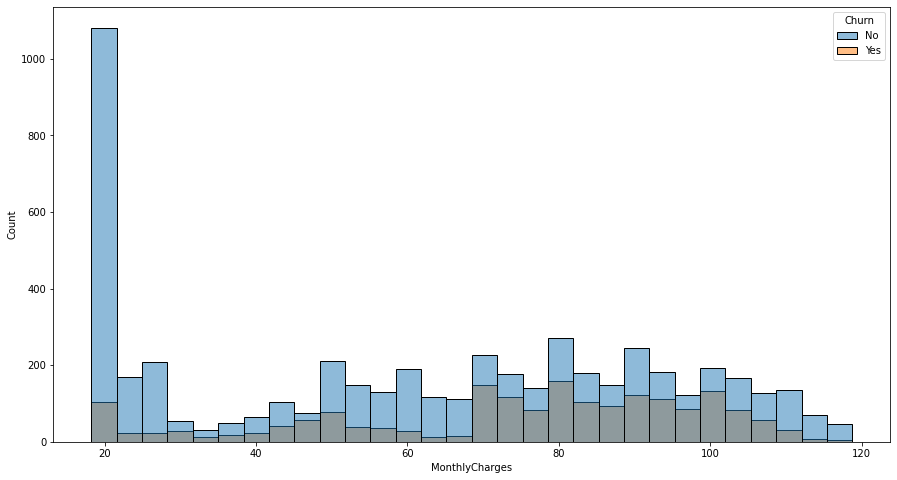

In [ ]:
# plotando gráfico com a quantidade de churn ou não churn para cada o valor da mensalidade
plt.subplots(figsize=(15,8))
sns.histplot(data = customers, x = customers['MonthlyCharges'], hue = 'Churn', bins=30)
plt.show()

In [ ]:
# Retirando colunas que não primeiro momento não serão uteis
customer_drop = customers.drop(['OnlineBackup', 'DeviceProtection', 'StreamingMovies'], axis=1)
customer_drop.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Transformando os dados de gênero categóricos em numéricos
customer_drop['gender'] = customer_drop['gender'].map({"Male":0 , "Female":1})

In [ ]:
# Transformando os dados categóricos de sim e não em numéricos
def transform_yes(valor):
  if valor == "No":
    return 0
  elif valor=='Yes':
    return 1
  else:
    return 2

customer_drop['Partner'] = customer_drop['Partner'].map(transform_yes)
customer_drop['Dependents'] = customer_drop['Dependents'].map(transform_yes)
customer_drop['PhoneService'] = customer_drop['PhoneService'].map(transform_yes)
customer_drop['MultipleLines'] = customer_drop['MultipleLines'].map(transform_yes)
customer_drop['OnlineSecurity'] = customer_drop['OnlineSecurity'].map(transform_yes)
customer_drop['TechSupport'] = customer_drop['TechSupport'].map(transform_yes)
customer_drop['StreamingTV'] = customer_drop['StreamingTV'].map(transform_yes)
customer_drop['PaperlessBilling'] = customer_drop['PaperlessBilling'].map(transform_yes)
customer_drop['Churn'] = customer_drop['Churn'].map(transform_yes)

customer_drop.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,DSL,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,DSL,1,1,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
# Transformando os outros dados categóricos em numéricos
encoding = customer_drop
encoding = pd.concat([encoding.drop("InternetService", axis=1), pd.get_dummies(encoding.InternetService)], axis=1)
encoding = pd.concat([encoding.drop("Contract", axis=1), pd.get_dummies(encoding.Contract)], axis=1)
encoding = pd.concat([encoding.drop("PaymentMethod", axis=1), pd.get_dummies(encoding.PaymentMethod)], axis=1)

In [ ]:
encoding.info()
# Agora temos que só customerID possui tipo de dado objeto e TotalCharges(Esse temos que mudar)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   gender                     7043 non-null   int64  
 2   SeniorCitizen              7043 non-null   int64  
 3   Partner                    7043 non-null   int64  
 4   Dependents                 7043 non-null   int64  
 5   tenure                     7043 non-null   int64  
 6   PhoneService               7043 non-null   int64  
 7   MultipleLines              7043 non-null   int64  
 8   OnlineSecurity             7043 non-null   int64  
 9   TechSupport                7043 non-null   int64  
 10  StreamingTV                7043 non-null   int64  
 11  PaperlessBilling           7043 non-null   int64  
 12  MonthlyCharges             7043 non-null   float64
 13  TotalCharges               7043 non-null   float

In [ ]:
# Forçando a transformação do total charges em numérico
encoding['TotalCharges'] = pd.to_numeric(encoding['TotalCharges'], errors='coerce')

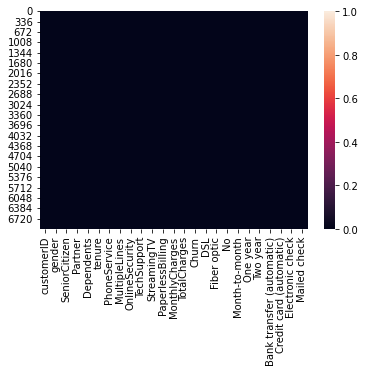

In [ ]:
# olhando se possui algum dados NaN
sns.heatmap(encoding.isna())

In [ ]:
# Preenchendo com 0 caso ainda existe algum número NaN
encoding = encoding.fillna(0)

In [ ]:
# Aplicando StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoding[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(encoding[['MonthlyCharges', 'TotalCharges']])

Agora vamos começar de fato a classificação

In [ ]:
# Separando os dados em X e y
y = encoding['Churn'] 
X = encoding.drop(['customerID', 'Churn'], axis=1)

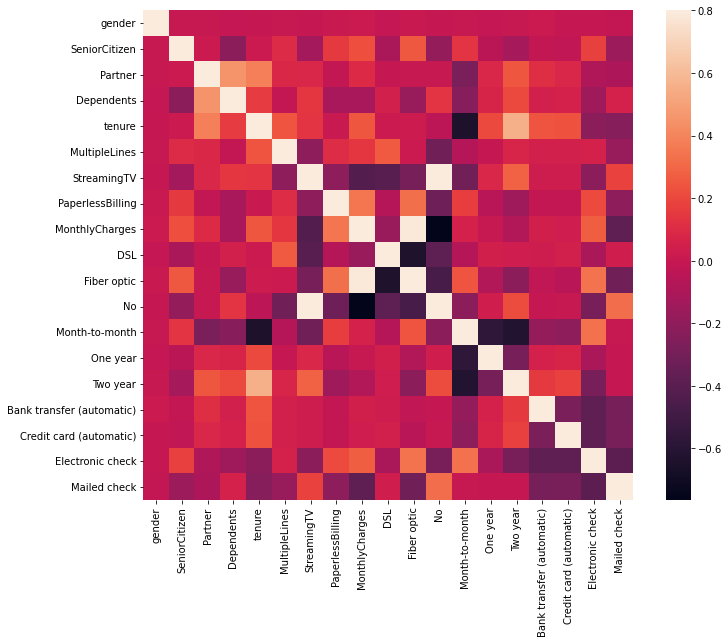

In [ ]:
# OLhando a correlação do dados
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# Parece que faz sentido tirar OnlineSecurity,  TechSupport,  'TotalCharges', 'PhoneService'

In [ ]:
# Separando novamente os dados em X com base na correlação
y = encoding['Churn'] 
X = encoding.drop(['customerID', 'Churn', 'OnlineSecurity', 'TechSupport', 'TotalCharges', 'PhoneService'], axis=1)

In [ ]:
# Dividindo os dados em treino, teste e validação
from sklearn.model_selection import train_test_split

seed = 0

#Construa os Datasets de Treino e Teste
X_training,X_test, y_training, y_test= train_test_split(X, y, random_state=seed, test_size=0.25, stratify=y)

#Construa o Dataset de Validação
X_train, X_val, y_train,  y_val = train_test_split(X_training, y_training, random_state=seed,
                         test_size=0.33, stratify=y_training)

In [ ]:
# Importando bibliotecs para aplicar diferentes técnicas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Definir os possiveis valores para cada hiperparametro para serem explorados
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3]}

# Criar objeto com o DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=seed)

# Criar objeto KFold com StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# Criar um objeto de grade de busca com GridSearchCV, a partir dos parâmetros que definimos
grid_search = GridSearchCV(tree, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_training, y_training))

# Treinar o modelo com o grid search
grid_search.fit(X_training, y_training)


# Printar a melhor combinação de hiperparâmetros
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

# Gera uma árvore com as melhores combinações de hiperparâmetros
tree_3 = DecisionTreeClassifier(random_state=seed, max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Fita o modelo com o dataset de treino
tree_3.fit(X_train, y_train)

# Usa o modelo para prever o conjunto de validação
y_pred = tree_3.predict(X_val)

# Calcular e printar métricas
print("Acurácia no conjunto de treino: {:.3f}".format(tree_3.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(tree_3.score(X_val, y_val)))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("Área sob a curva ROC: {:.3f}".format(roc_auc_score(y_val, y_pred)))

Melhores hiperparâmetros:
{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Acurácia no conjunto de treino: 0.795
Acurácia no conjunto de validação: 0.796
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1281
           1       0.65      0.51      0.57       463

    accuracy                           0.80      1744
   macro avg       0.74      0.70      0.72      1744
weighted avg       0.78      0.80      0.79      1744

[[1154  127]
 [ 229  234]]
Área sob a curva ROC: 0.703


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Definir os possiveis valores para cada hiperparametro para serem explorados
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3]}

# Criar objeto com o RandomForestClassifier
rd_forest= RandomForestClassifier(random_state=seed)

# Criar objeto KFold com StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# Criar um objeto de grade de busca com GridSearchCV, a partir dos parâmetros que definimos
grid_search = GridSearchCV(tree, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_training, y_training))

# Treinar o modelo com o grid search
grid_search.fit(X_training, y_training)


# Printar a melhor combinação de hiperparâmetros
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

# Gera uma árvore com as melhores combinações de hiperparâmetros
rd_forest = RandomForestClassifier(random_state=seed, max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Fita o modelo com o dataset de treino
rd_forest.fit(X_train, y_train)

# Usa o modelo para prever o conjunto de validação
y_pred = rd_forest.predict(X_val)

# Calcular e printar métricas
print("Acurácia no conjunto de treino: {:.3f}".format(rd_forest.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(rd_forest.score(X_val, y_val)))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("Área sob a curva ROC: {:.3f}".format(roc_auc_score(y_val, y_pred)))

Melhores hiperparâmetros:
{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Acurácia no conjunto de treino: 0.793
Acurácia no conjunto de validação: 0.803
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1281
           1       0.71      0.43      0.54       463

    accuracy                           0.80      1744
   macro avg       0.77      0.68      0.71      1744
weighted avg       0.79      0.80      0.79      1744

[[1201   80]
 [ 263  200]]
Área sob a curva ROC: 0.685


In [ ]:
# Regressão logística

from sklearn.linear_model import LogisticRegression

# Generate a range with different values for C parameter
grid = {"C": [1,150,5, 3, 10, 50]}
logreg_cv = GridSearchCV(LogisticRegression(solver='liblinear'), grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("Melhores hiperparâmetros: ", logreg_cv.best_params_)

y_pred_logreg = logreg_cv.predict(X_val)

print("Acurácia no dataset de treino: {:.3f}".format(logreg_cv.score(X_train, y_train)))
print("Acurácia no dataset de validação: {:.3f}".format(logreg_cv.score(X_val, y_val)))
print(classification_report(y_val, y_pred_logreg))
print(confusion_matrix(y_val, y_pred_logreg))
print("AUC: {:.3f}".format(roc_auc_score(y_val, y_pred_logreg)))

#Métrica de Avaliação do Modelo (Utilizado para nota)
acur_val_logreg = logreg_cv.score(X_val, y_val)

ex_6_4 = acur_val_logreg

Melhores hiperparâmetros:  {'C': 150}
Acurácia no dataset de treino: 0.800
Acurácia no dataset de validação: 0.819
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1281
           1       0.70      0.56      0.62       463

    accuracy                           0.82      1744
   macro avg       0.77      0.74      0.75      1744
weighted avg       0.81      0.82      0.81      1744

[[1169  112]
 [ 204  259]]
AUC: 0.736


In [ ]:
# XGBOOST
import xgboost as xgb

# XGBoost com Cross Validation

from sklearn.model_selection import GridSearchCV

# Define um conjunto de possíveis valores para os hiperparâmetros
params = {'learning_rate': [0.1, 0.2, 0.3],
          'alpha': [5, 10, 15],
          'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 1.0],
          'max_depth': [3, 4, 5]}

# Cria o modelo
xgb_model_cv_gs = xgb.XGBClassifier(objective="binary:logistic", random_state=seed,
                                    eval_metric="auc", n_estimators=10,use_label_encoder=False)

# Cria o grid search com validação cruzada estratificada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
grid_search = GridSearchCV(xgb_model_cv_gs, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_training, y_training))

# Treina o modelo e printa os melhores hiperparâmetros
grid_search.fit(X_training, y_training)
print('\n Melhores hiperparâmetros:')
print(grid_search.best_params_)

# Obtém os resultados da validação cruzada
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Acurácia média no conjunto de validação: {:.3f} +/- {:.3f}".format(
  cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
  cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])
)

# Atribui os melhores valores para os hiperparâmetros
xgb_model_cv_gs.set_params(learning_rate = grid_search.best_params_['learning_rate'],
                           alpha = grid_search.best_params_['alpha'],
                           colsample_bytree = grid_search.best_params_['colsample_bytree'],
                           max_depth = grid_search.best_params_['max_depth'])

# Treina o modelo usando os melhores hiperparâmetros
xgb_model_cv_gs.fit(X_training, y_training)

y_pred_xgb = xgb_model_cv_gs.predict(X_val)

print("Acurácia no dataset de treino: {:.3f}".format(xgb_model_cv_gs.score(X_train, y_train)))
print("Acurácia no dataset de validação: {:.3f}".format(xgb_model_cv_gs.score(X_val, y_val)))
print(classification_report(y_val, y_pred_xgb))
print(confusion_matrix(y_val, y_pred_xgb))
print("AUC: {:.3f}".format(roc_auc_score(y_val, y_pred_xgb)))

#Métrica de Avaliação do Modelo (Utilizado para nota)
acur_val_xgb = xgb_model_cv_gs.score(X_val, y_val)

ex_6_5 = acur_val_xgb


 Melhores hiperparâmetros:
{'alpha': 5, 'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 4}
Acurácia média no conjunto de validação: 0.845 +/- 0.013
Acurácia no dataset de treino: 0.806
Acurácia no dataset de validação: 0.818
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1281
           1       0.69      0.57      0.62       463

    accuracy                           0.82      1744
   macro avg       0.77      0.74      0.75      1744
weighted avg       0.81      0.82      0.81      1744

[[1164  117]
 [ 200  263]]
AUC: 0.738


In [ ]:
# Jutando a decisição de cada metódo para votarem e fazerem juntos a previsão
from sklearn.ensemble import VotingClassifier
clf = DecisionTreeClassifier(random_state=seed, max_depth= 4, min_samples_leaf= 3, min_samples_split= 2)
clf1 = RandomForestClassifier(random_state=seed, max_depth= 5, min_samples_leaf= 1, min_samples_split= 5)
clf2 = LogisticRegression(random_state=seed, solver='liblinear', C=150)
clf3 = xgb.XGBClassifier(alpha= 5, colsample_bytree= 1.0, learning_rate =0.3, max_depth= 4, random_state=seed, objective="binary:logistic", eval_metric="auc")

eclf = VotingClassifier(estimators=[('DT', clf),('RF', clf1), ('LR', clf2), ('XGB', clf3)],
                        voting='soft', weights=[2,0,2,2])

eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_leaf=3,
                                                     random_state=0)),
                             ('RF',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_split=5,
                                                     random_state=0)),
                             ('LR',
                              LogisticRegression(C=150, random_state=0,
                                                 solver='liblinear')),
                             ('XGB',
                              XGBClassifier(alpha=5, colsample_bytree=1.0,
                                            eval_metric='auc',
                                            learning_rate=0.3, max_depth=4))],
                 voting='soft', weights=[2, 0, 2, 2])

In [ ]:
# Avaliando o modelo
predictions = eclf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.65      0.54      0.59       467

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



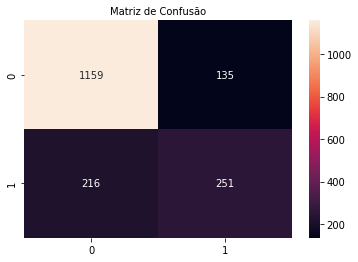

In [ ]:
# Ainda avaliando o modelo
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt = "d")
    
plt.title("Matriz de Confusão",fontsize=10)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8006814310051107
